In [7]:
import numpy
from pycbc.waveform import generator
from matplotlib import pyplot as plt
from pycbc import psd, filter
import numpy as np
from random import seed
from random import gauss
import pycbc
import pylab

In [2]:
genclass = generator.TDomainFreqTauRingdownGenerator
detectors = ['H1', 'L1']

delta_f = 1./8
delta_t = 1./2048

f_lower = 20.
f_final = 1024.

params = {}
params['amp220'] = 5.e-21
params['amp221'] = 2
params['f_220'] = 256.607043264397
params['f_221'] = 250.9439959543337
params['tau_220'] = 0.004047225085452862
params['tau_221'] = 0.001338559280517331
params['dec'] = -1.25
params['distance'] = 410.0
#params['f_lower'] = 18.0
#params['f_ref'] = 20.0
#params['final_mass'] = 63.0
#params['final_spin'] = 0.64
params['inclination'] = 2.5
params['injtype'] = 'ringdown'
params['lmns'] = '222'
params['phi220'] = 2.0
params['phi221'] = 1.1
params['polarization'] = 1.75
params['ra'] = 2.2
params['t_final'] = 1.
params['tc'] = 0.
params['approximant'] = 'TdQNMfromFreqTau'

tc = params['tc']

gen = generator.FDomainDetFrameGenerator(genclass, 
                                             epoch=tc,
                                             detectors=detectors,
                                             variable_args=params.keys(),
                                             f_lower = f_lower,
                                             f_final = f_final,
                                             delta_f=delta_f,
                                             delta_t=delta_t)

signal = gen.generate(**params)

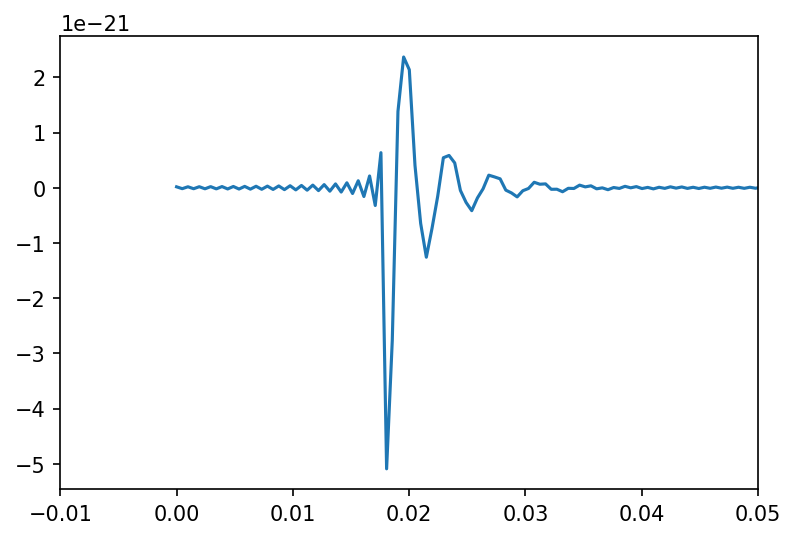

In [3]:
fig = plt.figure(0)

plt.plot(signal['H1'].to_timeseries().sample_times, signal['H1'].to_timeseries())

plt.xlim(-0.01,0.05)

fig.set_dpi(150)
plt.show()

In [53]:
adv_psd = {}
for det in detectors:
    adv_psd[det] = psd.analytical.aLIGOZeroDetHighPower(length=1024*8+1, delta_f=1./8, low_freq_cutoff=20)

In [54]:
help(psd.analytical.aLIGOZeroDetHighPower)

Help on function aLIGOZeroDetHighPower in module pycbc.psd.analytical:

aLIGOZeroDetHighPower(length, delta_f, low_freq_cutoff)
    Return a FrequencySeries containing the aLIGOZeroDetHighPower PSD from LALSimulation.



In [58]:
delta_t = 1.0 / 4096
tsamples = int(32 / delta_t)
ts = pycbc.noise.noise_from_psd(tsamples, delta_t, psd, seed=127)

AttributeError: module 'pycbc.psd' has no attribute 'delta_f'

In [55]:
optsnr = {}

snrsq = {}
addsnr = 0
for det in signal.keys():
    snrsq[det] = filter.sigmasq(signal[det], psd=adv_psd[det],
                    low_frequency_cutoff=f_lower,
                    high_frequency_cutoff=f_final)
    addsnr += snrsq[det]
optsnr = numpy.sqrt(addsnr)

print(optsnr)

72.31060179760523


In [56]:
for _ in range(10):
    value = gauss(0, np.sqrt(adv_psd[det][i]))
    print(value)

NameError: name 'i' is not defined

In [77]:
# The color of the noise matches a PSD which you provide
flen = int(2048 / delta_f) + 1
psd = pycbc.psd.aLIGOZeroDetHighPower(len(signal['H1'].to_timeseries()), delta_f, f_lower)

# Generate 4 seconds of noise at 4096 Hz
tsamples = int(4 / delta_t)
ts = pycbc.noise.noise_from_psd(tsamples, delta_t, psd, seed=127)


In [78]:
pylab.plot(ts.sample_times, ts+signal['H1'].to_timeseries())
pylab.ylabel('Strain')
pylab.xlabel('Time (s)')
pylab.show()

ValueError: lengths do not match

NameError: name 'get_lm_f0tau' is not defined

In [12]:
from pycbc.conversions import get_lm_f0tau
import qnm

In [13]:
def wRD_to_f_Phys(f,M):
    c=2.99792458*10**8;G=6.67259*10**(-11);MS=1.9885*10**30;
    return (c**3/(M*MS*G*2*np.pi))*f

def tauRD_to_t_Phys(tau,M):
    c=2.99792458*10**8;G=6.67259*10**(-11);MS=1.9885*10**30;
    return ((M*MS*G)/c**3)*tau

In [26]:
omegas = [qnm.modes_cache(s=-2,l=2,m=2,n=i)(a=0.7)[0] for i in range (0,2)]
w = (np.real(omegas))/1
tau=-1/(np.imag(omegas))*1

In [33]:
tauRD_to_t_Phys(tau[0],69)

0.004205658110224193

In [34]:
frompycbc=get_lm_f0tau(69, 0.7, 2, 2, 2)

In [35]:
frompycbc[1]

array([0.00420654, 0.00139151])

In [38]:
0.00139151*2.5

0.0034787750000000004